In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import torch.nn.functional as F
import matplotlib.pyplot as plt

## basics

In [2]:
# scaler
t1 = torch.tensor(10.)
print(t1)
print(t1.item())
print(t1.dtype)

tensor(10.)
10.0
torch.float32


In [3]:
# vector
t2 = torch.tensor([1, 2, 3])
print(t2)
print(t2[1].item())
print(t2.dtype)

tensor([1, 2, 3])
2
torch.int64


In [4]:
# matrix
t3 = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(t3)
print(t3[1, 2].item())
print(t3.dtype)

tensor([[1, 2, 3],
        [4, 5, 6]])
6
torch.int64


In [5]:
# 3-d array
t4 = torch.tensor([
    [[1, 2], [3., 4]], 
    [[5, 6], [7, 8]], 
    [[9, 10], [11, 12]]])
print(t4)
print(t4[2, 0, 1].item())
print(t4.dtype)
print(f'Shape: {t4.shape}')

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])
10.0
torch.float32
Shape: torch.Size([3, 2, 2])


In [6]:
x = torch.tensor(10.)
w = torch.tensor(2., requires_grad=True)
b = torch.tensor(1., requires_grad=True)
x, w, b

(tensor(10.), tensor(2., requires_grad=True), tensor(1., requires_grad=True))

In [7]:
y = w * x + b
y

tensor(21., grad_fn=<AddBackward0>)

In [8]:
y.backward()

In [9]:
print(x.grad)  # This will be None since x does not require gradient
print(f'Gradient of w: {w.grad}')
print(f'Gradient of b: {b.grad}')

None
Gradient of w: 10.0
Gradient of b: 1.0


In [10]:
t6 = torch.full((2, 3), 1.0)
t6

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [11]:
t7 = torch.cat((t3, t3), dim=0)
t7

tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]])

In [12]:
t8 = torch.sin(t7)
t8

tensor([[ 0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794],
        [ 0.8415,  0.9093,  0.1411],
        [-0.7568, -0.9589, -0.2794]])

In [13]:
t9 = t8.reshape(3, 2, 2)
t9

tensor([[[ 0.8415,  0.9093],
         [ 0.1411, -0.7568]],

        [[-0.9589, -0.2794],
         [ 0.8415,  0.9093]],

        [[ 0.1411, -0.7568],
         [-0.9589, -0.2794]]])

## numpy

In [14]:
x = np.array([[1, 2.], [4, 5]])
print(x)
print(type(x))
print(x.dtype)

[[1. 2.]
 [4. 5.]]
<class 'numpy.ndarray'>
float64


In [15]:
y = torch.from_numpy(x)
y

tensor([[1., 2.],
        [4., 5.]], dtype=torch.float64)

In [16]:
z = y.numpy()
print(z)
print(type(z))

[[1. 2.]
 [4. 5.]]
<class 'numpy.ndarray'>


## linear regression

In [17]:
# input (temp, rainfall, humidity)
x = np.array([[73, 67, 43],
              [91, 88, 64],
              [87, 134, 58],
              [102, 43, 37],
              [69, 96, 70],
              [74, 66, 43],
              [91, 87, 65],
              [88, 134, 58],
              [102, 43, 37],
              [69, 96, 70]], dtype='float32')

In [18]:
# targets (apples, oranges)
y = np.array([[56, 70],
              [81, 101],
              [119, 133],
              [22, 37],
              [103, 119],
              [57, 69],
              [81, 100],
              [119, 133],
              [22, 37],
              [103, 87]], dtype='float32')

In [19]:
x = torch.from_numpy(x)
y = torch.from_numpy(y)
print(f'Input shape: {x.shape}')
print(f'Target shape: {y.shape}')

Input shape: torch.Size([10, 3])
Target shape: torch.Size([10, 2])


In [20]:
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)

In [21]:
def model(x):
    return x @ w.T + b

In [22]:
preds = model(x)
preds

tensor([[134.2026,  -8.0956],
        [172.1265,  -2.6668],
        [217.7525, -10.2642],
        [133.8019, -24.2242],
        [161.5357,  11.7738],
        [134.0039,  -8.4726],
        [171.0550,  -1.7832],
        [218.6205, -10.7469],
        [133.8019, -24.2242],
        [161.5357,  11.7738]], grad_fn=<AddBackward0>)

In [23]:
y

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 81., 100.],
        [119., 133.],
        [ 22.,  37.],
        [103.,  87.]])

In [24]:
loss = torch.mean((preds - y) ** 2)
loss

tensor(8951.8115, grad_fn=<MeanBackward0>)

In [25]:
loss.backward()

In [26]:
with torch.no_grad():
    w -= 1e-5 * w.grad
    b -= 1e-5 * b.grad

In [27]:
preds = model(x)
loss = torch.mean((preds - y) ** 2)
loss

tensor(6152.8188, grad_fn=<MeanBackward0>)

In [28]:
# Training loop with proper gradient handling
for epoch in range(10000):
    # Forward pass
    preds = model(x)
    loss = torch.mean((preds - y) ** 2)
    
    # Backward pass
    loss.backward()
    
    # Update parameters (without tracking gradients)
    with torch.no_grad():
        w -= 1e-5 * w.grad
        b -= 1e-5 * b.grad
    
    # Zero gradients for next iteration
    w.grad.zero_()
    b.grad.zero_()
    
    # Print loss every 20 epochs
    if epoch % 1000 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 6152.8188
Epoch 1000, Loss: 43.8595
Epoch 2000, Loss: 34.9555
Epoch 3000, Loss: 33.6467
Epoch 4000, Loss: 33.4542
Epoch 5000, Loss: 33.4258
Epoch 6000, Loss: 33.4216
Epoch 7000, Loss: 33.4208
Epoch 8000, Loss: 33.4206
Epoch 9000, Loss: 33.4205


In [29]:
preds = model(x)
loss = torch.mean((preds - y) ** 2)
print(f'Final Loss: {loss.item():.4f}')

Final Loss: 33.4203


In [30]:
preds

tensor([[ 57.3113,  68.8299],
        [ 82.4651,  94.3095],
        [119.0965, 133.5669],
        [ 21.3885,  40.0295],
        [102.0174, 107.6389],
        [ 56.0671,  67.7748],
        [ 82.2971,  93.8603],
        [118.7036, 133.4103],
        [ 21.3885,  40.0295],
        [102.0174, 107.6389]], grad_fn=<AddBackward0>)

In [31]:
y

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 57.,  69.],
        [ 81., 100.],
        [119., 133.],
        [ 22.,  37.],
        [103.,  87.]])

### using nn

In [32]:
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [33]:
inputs, targets

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.],
         [ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.],
         [102.,  43.,  37.],
         [ 69.,  96.,  70.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.],
         [ 56.,  70.],
         [ 81., 101.],
         [119., 133.],
         [ 22.,  37.],
         [103., 119.]]))

In [34]:
train_ds = TensorDataset(inputs, targets)
train_ds[0:2]

(tensor([[73., 67., 43.],
         [91., 88., 64.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.]]))

In [35]:
batch_size = 5
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)

In [36]:
for xb, yb in train_dl:
    print(f'Batch size: {xb.shape[0]}')
    print(f'Batch inputs: {xb}')
    print(f'Batch targets: {yb}')
    break  # Just show the first batch

Batch size: 5
Batch inputs: tensor([[ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
Batch targets: tensor([[119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 22.,  37.],
        [103., 119.]])


In [37]:
model = nn.Linear(3, 2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.5220,  0.5338,  0.4109],
        [-0.1423,  0.3060, -0.1168]], requires_grad=True)
Parameter containing:
tensor([0.3825, 0.2658], requires_grad=True)


In [38]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.5220,  0.5338,  0.4109],
         [-0.1423,  0.3060, -0.1168]], requires_grad=True),
 Parameter containing:
 tensor([0.3825, 0.2658], requires_grad=True)]

In [39]:
preds = model(inputs)
preds

tensor([[ 15.7113,   5.3609],
        [ 26.1547,   6.7741],
        [ 50.3325,  22.1204],
        [-14.7041,  -5.4092],
        [ 44.3750,  11.6520],
        [ 15.7113,   5.3609],
        [ 26.1547,   6.7741],
        [ 50.3325,  22.1204],
        [-14.7041,  -5.4092],
        [ 44.3750,  11.6520],
        [ 15.7113,   5.3609],
        [ 26.1547,   6.7741],
        [ 50.3325,  22.1204],
        [-14.7041,  -5.4092],
        [ 44.3750,  11.6520]], grad_fn=<AddmmBackward0>)

In [40]:
loss_fn = F.mse_loss

In [41]:
loss = loss_fn(preds, targets)
print(f'Loss: {loss.item()}')

Loss: 5280.36669921875


In [42]:
opt = torch.optim.SGD(model.parameters(), lr=1e-5)

In [43]:
losses = []
def fit(num_epochs, model, loss_fn, opt, train_dl):
    for epoch in range(num_epochs):
        for xb, yb in train_dl:
            # Forward pass
            preds = model(xb)
            loss = loss_fn(preds, yb)
            losses.append(loss.item())
            
            # Backward pass
            loss.backward()
            
            # Update parameters
            opt.step()
            opt.zero_grad()  
            
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

In [44]:
fit(100, model, loss_fn, opt, train_dl)

Epoch 0, Loss: 2276.6309
Epoch 10, Loss: 140.9562
Epoch 20, Loss: 64.6191
Epoch 30, Loss: 80.3020
Epoch 40, Loss: 25.4348
Epoch 50, Loss: 52.5382
Epoch 60, Loss: 46.6090
Epoch 70, Loss: 31.1266
Epoch 80, Loss: 24.7911
Epoch 90, Loss: 12.1385


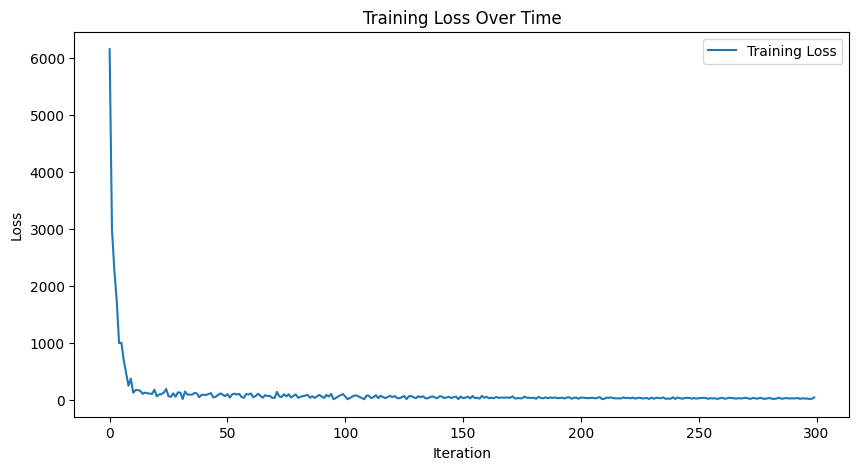

In [45]:
plt.figure(figsize=(10, 5))
plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.show()

In [46]:
preds = model(inputs)
preds

tensor([[ 57.4938,  71.5998],
        [ 81.7737,  97.2505],
        [119.4038, 139.6659],
        [ 22.3517,  43.0267],
        [100.4830, 109.6611],
        [ 57.4938,  71.5998],
        [ 81.7737,  97.2505],
        [119.4038, 139.6659],
        [ 22.3517,  43.0267],
        [100.4830, 109.6611],
        [ 57.4938,  71.5998],
        [ 81.7737,  97.2505],
        [119.4038, 139.6659],
        [ 22.3517,  43.0267],
        [100.4830, 109.6611]], grad_fn=<AddmmBackward0>)

In [47]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

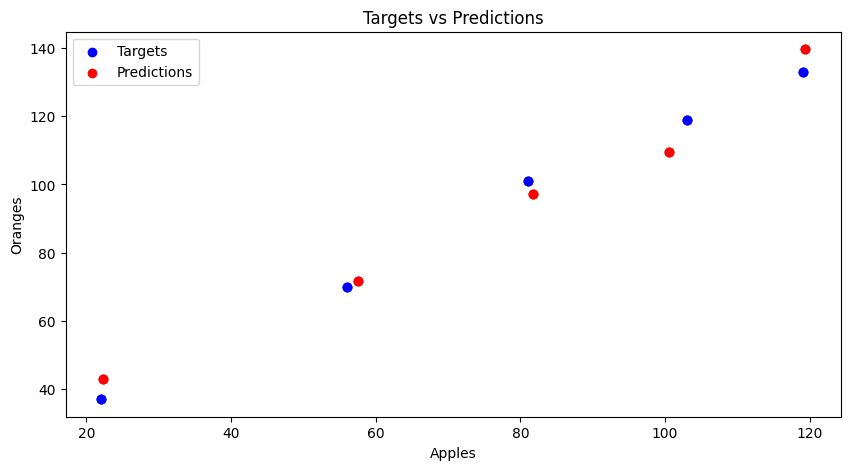

In [48]:
plt.figure(figsize=(10, 5))
plt.scatter(targets[:, 0].numpy(), targets[:, 1].numpy(), label='Targets', color='blue')
plt.scatter(preds[:, 0].detach().numpy(), preds[:, 1].detach().numpy(), label='Predictions', color='red')
plt.xlabel('Apples')
plt.ylabel('Oranges')
plt.title('Targets vs Predictions')
plt.legend()
plt.show()